# Linear regression using the Normal Equation

In [25]:
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [26]:
def save_fig(fig_name, tight_layout=True):
    path =os.path.join('data', "images", fig_name+'.png')
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [30]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

Saving figure generated_data_plot


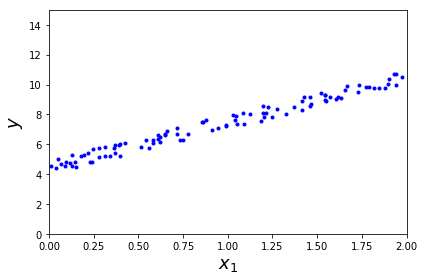

In [31]:
plt.plot(X, y, "b.")
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig('generated_data_plot')
plt.show()

In [38]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normal equation

In [39]:
theta_best

array([[4.51359766],
       [2.98323418]])

y = 4 + 3*xに近い！！

x = 0 , 2の時の，正規方程式で求めたパラメータによる推測値（直線で結ぶために求めておく）

In [42]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

Saving figure linear_model_predictions


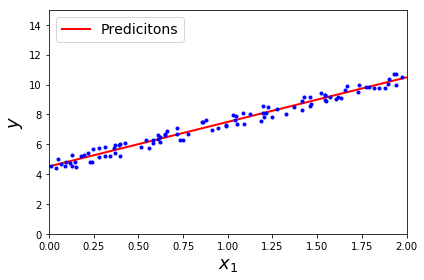

In [43]:
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Predicitons')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([0,2,0,15])
save_fig('linear_model_predictions')
plt.show()

## scikit learnによるLinearRegression

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

scikit learnで求めた場合と同じ！

ちなみにscikit learnでは，下記の「擬似逆行列」を使った計算をしているだけ（a = X^-1 * y）

ただし，一般的な正規方程式（Xの転置を両辺にかける方法）よりも逆行列の計算コストが多くかかるし，正規方程式の方が導入が自然[https://qiita.com/antimon2/items/ac1ebaed75ad58406b94]

ちなみに，「擬似逆行列」は一般化逆行列ともいい，正則でない行列のみならず正則でなくかつ正方でない行列にも逆行列をとることを許す逆行列

In [48]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

In [47]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

# Linear regression using batch gradient descent

gradientは，MSEコスト関数の偏微分

In [49]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

上記X_bは全てのサンプルを使っている，これが「バッチ勾配降下法」と言われている所以．よって，サンプルが大規模だととてつもなく遅くなる．ただし，「特徴量の数」に対するスケーリングは優れている．また，特徴量が数十万個ある場合は逆行列を求める正規方程式よりもずっと高速．

In [50]:
theta

array([[4.51359766],
       [2.98323418]])

同じ結果！！（勾配降下法が完全に機能した！）

だが，eta（学習率）を変えてみたらどうだろう..

In [87]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta) # for make line
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r'$\eta = {}$'.format(eta), fontsize=16)

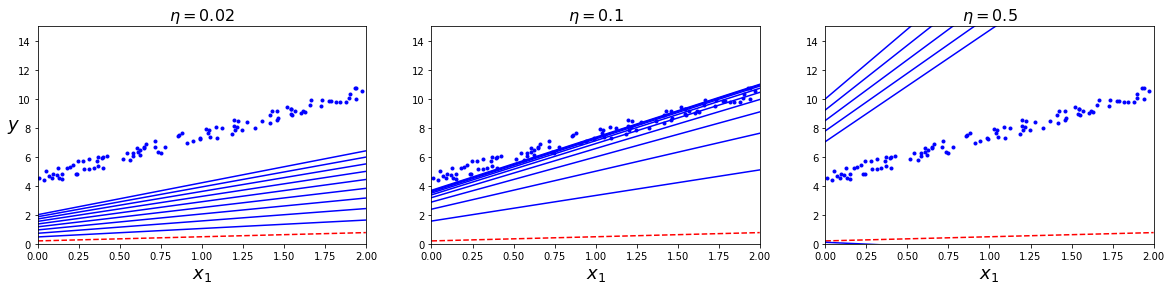

In [88]:
theta = np.random.randn(2, 1)

plt.figure(figsize=(20, 4))
plt.subplot(131);plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(132);plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133);plot_gradient_descent(theta, eta=0.5)

plt.show()

左のグラフは学習率が低すぎて収束に時間がかかる．中央のグラフはグッド！実際に収束し始めている．右のグラフは高すぎて発散してしまっている．

**scikit learnでは実装されていないことに注意しよう**

## Tips（収束率）

学習率が固定の場合，最適解にたどり着くためには，許容誤差εについて，O(1/ε)回のイテレーションが必要になる．つまり許容誤差を1/10にすれば，イテレーションは10倍になる．

# Stochastic Gradient Descent

In [71]:
theta_path_sgd = []
m = len(X_b)

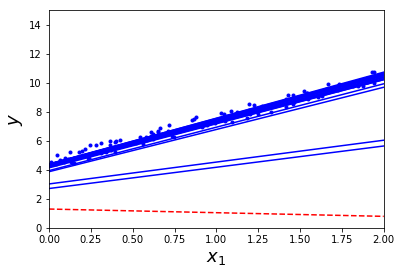

In [73]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [74]:
theta

array([[4.495073  ],
       [2.98458435]])

ほぼ最適解

SDG(確率的勾配降下法)は，各ステップでサンプルを「１つだけ」無作為に取り出すため，サンプル全体を使うバッチ勾配降下法に比べて非常に高速．しかもイテレーションごとにメモリに入れておかねばならないサンプルも１つだけなので，どれだけ巨大なサンプルでも学習できる（SDGは，アウトオブコアとして実装できる）．

一方で，確率的（つまり無作為）な性質をもつため，収束の仕方はかなり不規則．コストも上下に跳ねまわり”平均的に”収束する．よって，最終的なパラメータは十分良いが最適ではない．しかしながら，この不規則性により外に飛び出しやすいので局所最小解を抜けやすくもある．

つまり，無作為性は局所最小解を抜けるにはよいが，最小値になかなか落ち着かない可能性がある．このジレンマを解決するために，学習率を少しずつ小さくするという方法がある．学習が進むに連れて，ステップを小さくしていけば最小値に落ち着く（このプロセスが，溶けた金属を冷やしていく焼きなましに似ていることから「焼きなまし法」ともいう）．この学習率を決める関数を「学習スケジュール」と呼ぶ．この関数の定義は様々だが，学習率の下げ方を急激にしすぎたり，緩やかにしすぎたりしないように注意しよう．

## scikit learnによるSGD

In [78]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.Infinity, penalty=None, eta0=0.1, random_state=42)
# sgd_reg.fit(X, y.ravel())
sgd_reg.fit(X, y)

/Users/yamaji/study/python/py36/env/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=-inf, verbose=0,
       warm_start=False)

In [79]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51388816]), array([2.98206789]))

# Mini-batch gradient descent

In [98]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    # サンプル全体をランダムに並び替え
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # ミニバッチサイズ単位で取り出して勾配を計算
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [99]:
theta

array([[4.52651397],
       [2.99723869]])

SGDより最適解に近づいた！

ミニバッチは，バッチGDとSGDの折衷案のようなもの．バッチGDよりも多くのサンプル数に対して高速であり，SGDよりも最適解に近づきやすくなる．ただSGDよりも最適解付近を動き回るので，局所最小値からは逃れにくくはなる．

# バッチGD，SGD，ミニバッチGDの収束

In [101]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

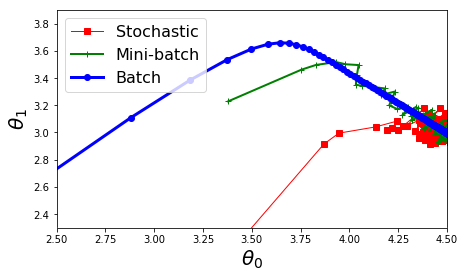

In [103]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc='upper left', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', fontsize=20)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

バッチはGDは最短距離で最適解に向かうが各ステップが非常に時間がかかること，SGDとミニバッチGDは適切な学習スケジュールを使えば，最適解に到達できることに注意